# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500,
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1,
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df

df = generate_data()

In [2]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

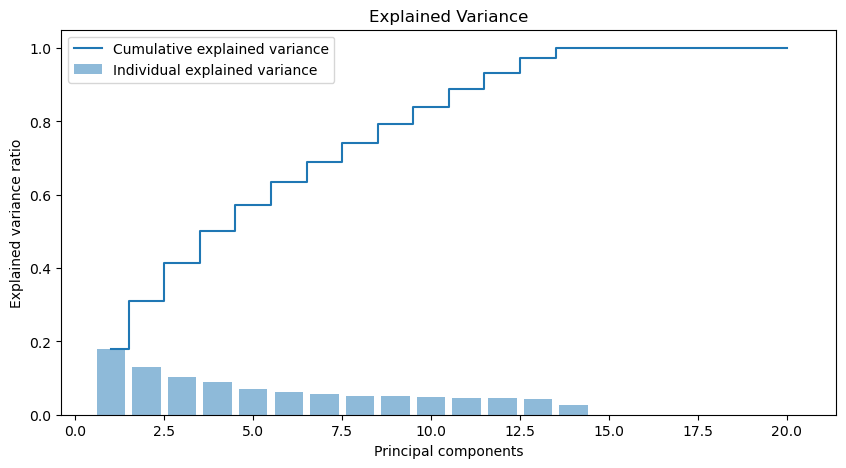

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Applying PCA.
pca = PCA(n_components=len(X_train.columns))
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(X_train.columns)+1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(X_train.columns)+1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance')
plt.show()


In [7]:
explained_variance_ratio, cumulative_variance


(array([1.78248763e-01, 1.31423463e-01, 1.03428992e-01, 8.93001375e-02,
        7.00271587e-02, 6.26207004e-02, 5.53463463e-02, 5.16479599e-02,
        4.98606225e-02, 4.86667259e-02, 4.67744196e-02, 4.42653499e-02,
        4.16638974e-02, 2.67254645e-02, 9.22847962e-33, 5.89266467e-33,
        3.29162504e-33, 2.19235065e-33, 1.73594162e-33, 6.43844319e-34]),
 array([0.17824876, 0.30967223, 0.41310122, 0.50240135, 0.57242851,
        0.63504921, 0.69039556, 0.74204352, 0.79190414, 0.84057087,
        0.88734529, 0.93161064, 0.97327454, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]))

 > I am going with 14 components as  it is capturing the most of the variablity in the data with over 97%.
 
 Results : 
 - Each number in this array represents the proportion of the dataset's total variance that is explained by each respective principal component. The first component explains about 17.82% of the variance, the second explains about 13.14%, and so on. The first few components add much of the variance. And each subsequent component add less than the previous component.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell.

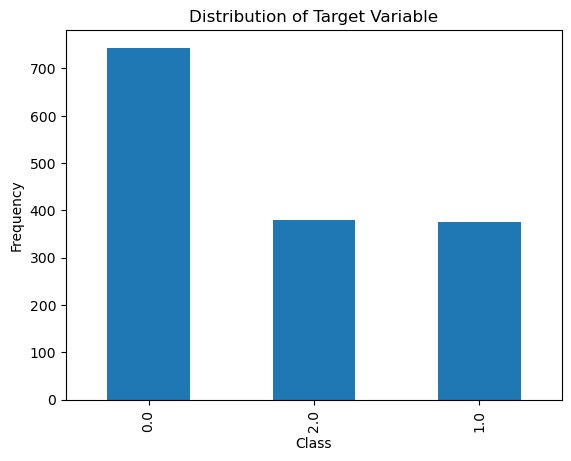

In [8]:
import matplotlib.pyplot as plt

# distribution of the target variable
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [9]:
# exact counts for each class
print(df['target'].value_counts())

target
0.0    744
2.0    380
1.0    376
Name: count, dtype: int64


- Above bar chart showing the distribution of the target variable, it is evident that the classes are imbalanced. The class labeled '0.0' has a significantly higher count compared to classes '1.0' and '2.0'. This imbalance can skew the performance metrics of a predictive model.

#### In order to evaluate the predictive model following metrics I would like to use.
 #### F1-score: 
F1-score incorporates both recall and precision into a single statistic, it is especially helpful in circumstances in which we are concerned with both false positives and false negatives. To have a better understanding of the model's capability to accurately categorize examples of the classes that occur less often, it is helpful.
 
#### Precision-Recall AUC: 
This is another good metric for imbalanced datasets as it focuses on the performance of the model on the minority class. It provides a comprehensive view of the trade-off between precision and recall for different probability thresholds.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [11]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [13]:
y_pred = logreg.predict(X_test_scaled)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
print(f'Average CV accuracy on training data: {accuracy:.2f}')
print(f'Accuracy:',accuracy)
print(f'Precision: ',precision)
print(f'Recall:', recall)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Average CV accuracy on training data: 0.70
Accuracy: 0.7033333333333334
Precision:  0.7040254342431762
Recall: 0.7033333333333334

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



- **Accuracy**: 70.33%
 representing the percentage of total correct predictions (both true positives and true negatives) out of all predictions made. An accuracy of 70% means that out of 300 test samples, the model correctly predicted the class for approximately 211 samples.
- **Precision** (Macro Average): 70.40%
- The macro-average precision of 70% indicates the average precision across all classes without weighing the class imbalance. This suggests that when the model predicts a class, it is correct about 70% of the time on average across all classes.
- **Recall** (Macro Average): 70.33%
Recall measures the model’s ability to detect positive instances for each class. A macro-average recall of 70.33% means that the model identifies 70.33% of all actual positives across all classes, on average. This indicates the model's 
effectiveness in covering the actual positive cases per class.
- **Weighted Average Precision and Recall**: 70%
These weighted averages account for class imbalance by weighing each class's contribution to the average by its relative size in the dataset. The figures suggest a similar performance to the overall accuracy, which shows consistency across differently sized classes.

##### Overall Performance:
- The model correctly predicts the class for 70% of the instances on test data, which may seem reasonable in this case.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=14)),  
    ('logistic_regression', LogisticRegression(max_iter=1000))
])


In [16]:
# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('logistic_regression', LogisticRegression(max_iter=1000))])

In [17]:
# Evaluating the model 
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)


In [18]:
average_cv_accuracy = np.mean(cv_scores)


In [19]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


In [20]:
print(f'Average CV accuracy on training data:',average_cv_accuracy)
print(f'Test Data - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Average CV accuracy on training data: 0.7216666666666667
Test Data - Accuracy: 0.7033333333333334, Precision: 0.7040254342431762, Recall: 0.7033333333333334

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



- **Accuracy**: 70.33%
The model correctly predicted the class labels for 70% of all instances in the test dataset.
- **Precision** (Macro Average): 70.40%
A macro average precision of 70% indicates that, when the model predicts an instance to be positive, it is correct about 70% of the time.
- **Recall** (Macro Average): 70.33%
Macro average recall of 70% suggests that the model correctly identifies 70% of all actual positives across the classes.

- **Weighted Average Precision and Recall**: 
70% These weighted averages account for class imbalance by weighing each class's contribution to the average by its relative size in the dataset. 
##### Comparing these to the PCA-based model:
It seems that using PCA in this case does not offer any performance advantage, possibly because of the information loss when reducing the data's dimensionality. 



# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Training the model
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:
# Predictions on the test data
y_pred_dt = decision_tree.predict(X_test)


In [23]:
# metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')

In [24]:
print(f'Average CV accuracy on training data: {average_cv_accuracy}')
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Average CV accuracy on training data: 0.7216666666666667
Accuracy: 0.6766666666666666
Precision: 0.6633805909678537
Recall: 0.6660605004682362

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



##### Decision Tree Model Evaluation

The decision tree was trained without using PCA to maintain all original features. The model was evaluated on the test data, yielding the following metrics:

- **Accuracy**: The average F1-score across all classes is 68%
- The F1-score weighted by the support for each class is also 68%, indicating the model’s balanced performance across classes  
- **Precision (Macro Average)**: The average recall across all classes, treating each class equally, is 66%.
- The recall, weighted by the support for each class, is also 66%.

- **Recall (Macro Average)**: The average across all classes is 67%, which measures the model's ability to find all relevant instances per class.

Comparatively, logistic regression is performing better in terms of accuracy, precision, and recall if the relationships in your data are more linear or if overfitting is a concern with decision trees
This comparison helps to understand the strengths and weaknesses of each model type and can guide you in choosing or tuning your models based on the specific characteristics of your dataset and the critical metrics for your application. 

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [25]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# pipeline with scaling, PCA, and decision tree classifier
pipeline_pca_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=14)),  
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

# Training pipeline
pipeline_pca_dt.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [26]:
# Predicting test data using the pipeline
y_pred_pca_dt = pipeline_pca_dt.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# metrics
accuracy_pca_dt = accuracy_score(y_test, y_pred_pca_dt)
precision_pca_dt = precision_score(y_test, y_pred_pca_dt, average='macro')
recall_pca_dt = recall_score(y_test, y_pred_pca_dt, average='macro')

print(f'Average CV accuracy on training data: {average_cv_accuracy}')
print(f"Accuracy: {accuracy_dt}")
print(f"Accuracy with PCA: {accuracy_pca_dt}")
print(f"Precision with PCA: {precision_pca_dt}")
print(f"Recall with PCA: {recall_pca_dt}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Average CV accuracy on training data: 0.7216666666666667
Accuracy: 0.6766666666666666
Accuracy with PCA: 0.7166666666666667
Precision with PCA: 0.694539884904032
Recall with PCA: 0.7114898944068968

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300




#### Comparing the PCA-enhanced model's results to original Decision Tree and Logistic Regression models:

> Original Decision Tree(No PCA) Accuracy: 68%,
> PCA-based Decision Tree Accuracy: 72%

> Original Logistic Regression (No PCA) Accuracy: 70.33%,
> PCA-based Logistic Regression Accuracy: 70.33%

>PCA -based Decision Tree F1-score stands at 71.6% , Precision & Recall stood at .69 & 0.71 respectively beating all other models.

Yes, We can conclude that PCA based Decision Tree model perfoms better than the original Decision tree and No PCA and PCA Logistic regression models. 

This improved accuracy and Precision & recall scores indicate that dimension reduction via PCA was beneficial in this case for removing non informative features. This also indicates PCA enhanced the Decision tree model's performance. 
